<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/7_1_Regression_lineaire_simple_de_A_a_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulation: Prédiction de prix immobilier selon la surface
Dataset généré:
  Nombre de maisons: 100
  Surface moyenne: 120.5 m²
  Prix moyen: 291,033€
  Corrélation surface-prix: 0.979

Paramètres du modèle trouvés:
Coefficient (pente): 1938.70€/m²
Intercept (ordonnée): 57,367€

Formule mathématique découverte:
Prix = 1939 × Surface + 57,367

Interprétation business:
  • Chaque m² supplémentaire ajoute 1939€ au prix
  • Une maison de 0 m² coûterait 57,367€ (coûts fixes)
  • Pour 100 m²: 251,237€
  • Pour 150 m²: 348,172€

Métriques de performance:
R² (coefficient de détermination): 0.9583
RMSE (erreur quadratique): 17,962€
MAE (erreur absolue moyenne): 14,021€

Interprétation du R² = 0.958:
  Excellent: Le modèle explique >90% de la variabilité
  → 95.8% de la variation des prix est expliquée par la surface
  → 4.2% reste inexpliqué (autres facteurs)


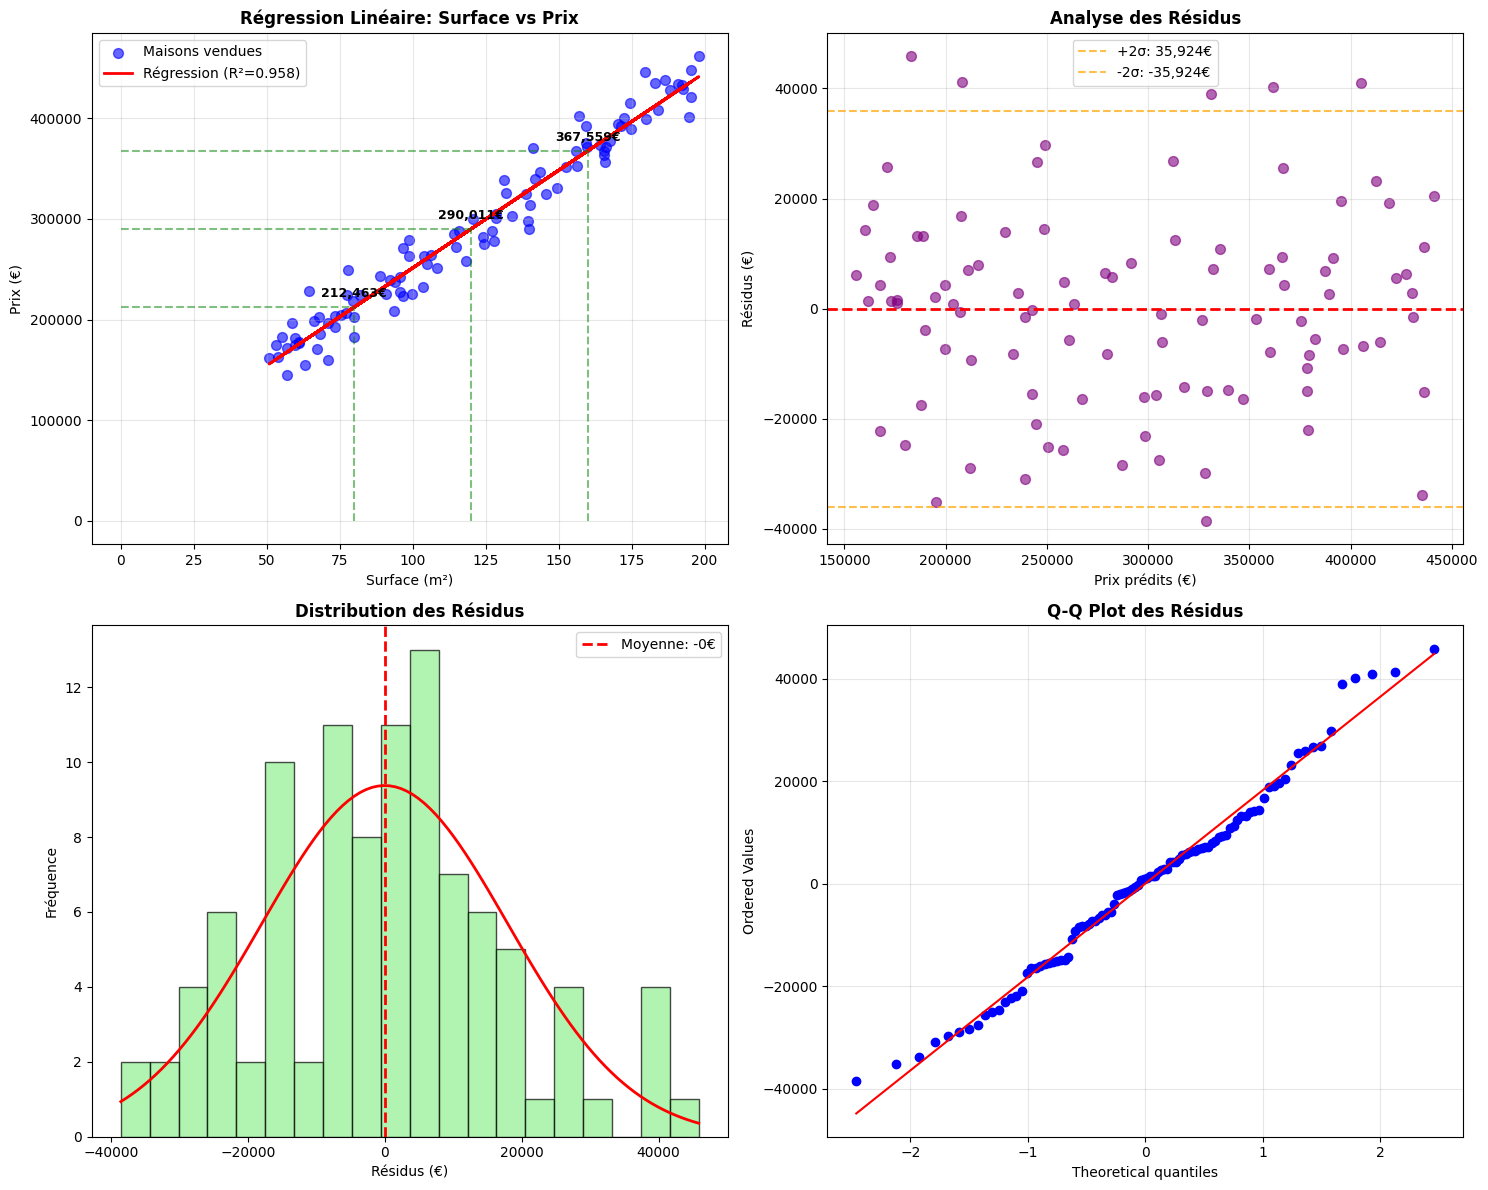


Analyse des résidus (diagnostic du modèle):
Moyenne des résidus: -0€
Écart-type des résidus: 17,962€
Médiane des résidus: 954€

Test de normalité (Shapiro-Wilk):
  Statistique: 0.9846
  P-value: 0.2984
  ✅ Les résidus suivent une distribution normale
     → Les hypothèses de la régression linéaire sont respectées

Test d'homoscédasticité (variance constante):
  Test de Levene: 0.1723, p-value: 0.6790
  ✅ Variance constante (homoscédasticité)
     → Hypothèse respectée

Détection de valeurs aberrantes:
  Résidus standardisés > 2: 6 maisons
  Valeurs aberrantes détectées:
    Maison 3: 140m², prix réel: 289,846€, prédit: 328,395€, erreur: -38,548€
    Maison 30: 141m², prix réel: 369,987€, prédit: 330,979€, erreur: 39,008€
    Maison 37: 65m², prix réel: 228,566€, prédit: 182,705€, erreur: 45,861€
    Maison 49: 78m², prix réel: 249,265€, prédit: 208,058€, erreur: 41,207€
    Maison 80: 179m², prix réel: 446,247€, prédit: 405,296€, erreur: 40,950€

Intervalles de confiance des prédictio

In [1]:
#Régression linéaire simple de A à Z
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import pandas as pd

# Créer des données réalistes de prix immobilier
print("Simulation: Prédiction de prix immobilier selon la surface")
print("=" * 70)

np.random.seed(42)
n_houses = 100

# Générer des surfaces (entre 50 et 200 m²)
surfaces = np.random.uniform(50, 200, n_houses)

# Créer une relation linéaire réaliste avec du bruit
# Prix = 2000€/m² + 50,000€ de base + bruit
prix_base = 2000 * surfaces + 50000
bruit = np.random.normal(0, 20000, n_houses)  # Bruit de ±20k€
prix = prix_base + bruit

# S'assurer que les prix restent réalistes
prix = np.clip(prix, 100000, 500000)

print(f"Dataset généré:")
print(f"  Nombre de maisons: {n_houses}")
print(f"  Surface moyenne: {surfaces.mean():.1f} m²")
print(f"  Prix moyen: {prix.mean():,.0f}€")
print(f"  Corrélation surface-prix: {np.corrcoef(surfaces, prix)[0,1]:.3f}")

# Créer le modèle de régression
# Reshape nécessaire car sklearn attend une matrice 2D
X = surfaces.reshape(-1, 1)  # Une seule feature
y = prix

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X, y)

# Faire des prédictions
y_pred = model.predict(X)

# Extraire les paramètres du modèle
coefficient = model.coef_[0]  # Pente de la ligne
intercept = model.intercept_  # Point d'intersection avec l'axe Y

print(f"\nParamètres du modèle trouvés:")
print("=" * 40)
print(f"Coefficient (pente): {coefficient:.2f}€/m²")
print(f"Intercept (ordonnée): {intercept:,.0f}€")

print(f"\nFormule mathématique découverte:")
print(f"Prix = {coefficient:.0f} × Surface + {intercept:,.0f}")

print(f"\nInterprétation business:")
print(f"  • Chaque m² supplémentaire ajoute {coefficient:.0f}€ au prix")
print(f"  • Une maison de 0 m² coûterait {intercept:,.0f}€ (coûts fixes)")
print(f"  • Pour 100 m²: {coefficient*100 + intercept:,.0f}€")
print(f"  • Pour 150 m²: {coefficient*150 + intercept:,.0f}€")

# Calculer les métriques de performance
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y - y_pred))
r2 = r2_score(y, y_pred)

print(f"\nMétriques de performance:")
print("=" * 30)
print(f"R² (coefficient de détermination): {r2:.4f}")
print(f"RMSE (erreur quadratique): {rmse:,.0f}€")
print(f"MAE (erreur absolue moyenne): {mae:,.0f}€")

# Interpréter le R²
print(f"\nInterprétation du R² = {r2:.3f}:")
if r2 > 0.9:
    print("  Excellent: Le modèle explique >90% de la variabilité")
elif r2 > 0.7:
    print("  Bon: Le modèle explique >70% de la variabilité")
elif r2 > 0.5:
    print("  Correct: Le modèle explique >50% de la variabilité")
else:
    print("  Faible: Le modèle explique <50% de la variabilité")

print(f"  → {r2*100:.1f}% de la variation des prix est expliquée par la surface")
print(f"  → {(1-r2)*100:.1f}% reste inexpliqué (autres facteurs)")

# Créer des visualisations complètes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot avec ligne de régression
axes[0, 0].scatter(surfaces, prix, alpha=0.6, color='blue', s=50, label='Maisons vendues')
axes[0, 0].plot(surfaces, y_pred, color='red', linewidth=2, label=f'Régression (R²={r2:.3f})')

# Ajouter quelques prédictions spécifiques
exemples_surfaces = [80, 120, 160]
for surf in exemples_surfaces:
    prix_predit = coefficient * surf + intercept
    axes[0, 0].plot([surf, surf], [0, prix_predit], 'g--', alpha=0.5)
    axes[0, 0].plot([0, surf], [prix_predit, prix_predit], 'g--', alpha=0.5)
    axes[0, 0].text(surf, prix_predit + 10000, f'{prix_predit:,.0f}€',
                   ha='center', fontweight='bold', fontsize=9)

axes[0, 0].set_xlabel('Surface (m²)')
axes[0, 0].set_ylabel('Prix (€)')
axes[0, 0].set_title('Régression Linéaire: Surface vs Prix', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Résidus (erreurs de prédiction)
residus = y - y_pred
axes[0, 1].scatter(y_pred, residus, alpha=0.6, color='purple', s=50)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Prix prédits (€)')
axes[0, 1].set_ylabel('Résidus (€)')
axes[0, 1].set_title('Analyse des Résidus', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Ajouter des lignes de confiance
std_residus = np.std(residus)
axes[0, 1].axhline(y=2*std_residus, color='orange', linestyle='--', alpha=0.7,
                  label=f'+2σ: {2*std_residus:,.0f}€')
axes[0, 1].axhline(y=-2*std_residus, color='orange', linestyle='--', alpha=0.7,
                  label=f'-2σ: {-2*std_residus:,.0f}€')
axes[0, 1].legend()

# 3. Distribution des résidus
axes[1, 0].hist(residus, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(np.mean(residus), color='red', linestyle='--', linewidth=2,
                  label=f'Moyenne: {np.mean(residus):,.0f}€')
axes[1, 0].set_xlabel('Résidus (€)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution des Résidus', fontweight='bold')
axes[1, 0].legend()

# Ajouter une courbe normale pour comparaison
x_norm = np.linspace(residus.min(), residus.max(), 100)
norm_curve = stats.norm.pdf(x_norm, np.mean(residus), np.std(residus))
norm_curve = norm_curve * len(residus) * (residus.max() - residus.min()) / 20
axes[1, 0].plot(x_norm, norm_curve, 'r-', linewidth=2, label='Normale théorique')

# 4. Q-Q plot pour tester la normalité des résidus
stats.probplot(residus, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot des Résidus', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse statistique des résidus
print(f"\nAnalyse des résidus (diagnostic du modèle):")
print("=" * 50)

print(f"Moyenne des résidus: {np.mean(residus):,.0f}€")
print(f"Écart-type des résidus: {np.std(residus):,.0f}€")
print(f"Médiane des résidus: {np.median(residus):,.0f}€")

# Test de normalité des résidus
shapiro_stat, shapiro_p = stats.shapiro(residus)
print(f"\nTest de normalité (Shapiro-Wilk):")
print(f"  Statistique: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("  ✅ Les résidus suivent une distribution normale")
    print("     → Les hypothèses de la régression linéaire sont respectées")
else:
    print("  ⚠️ Les résidus ne sont pas normalement distribués")
    print("     → Possible problème avec le modèle linéaire")

# Test d'homoscédasticité (variance constante)
# Diviser les prédictions en deux groupes
median_pred = np.median(y_pred)
low_pred_residus = residus[y_pred <= median_pred]
high_pred_residus = residus[y_pred > median_pred]

# Test de Levene pour l'égalité des variances
levene_stat, levene_p = stats.levene(low_pred_residus, high_pred_residus)

print(f"\nTest d'homoscédasticité (variance constante):")
print(f"  Test de Levene: {levene_stat:.4f}, p-value: {levene_p:.4f}")

if levene_p > 0.05:
    print("  ✅ Variance constante (homoscédasticité)")
    print("     → Hypothèse respectée")
else:
    print("  ⚠️ Variance non constante (hétéroscédasticité)")
    print("     → Les erreurs dépendent du niveau de prix")

# Détecter les valeurs aberrantes
# Utiliser la distance de Cook ou les résidus standardisés
residus_standardises = residus / np.std(residus)
outliers_mask = np.abs(residus_standardises) > 2

print(f"\nDétection de valeurs aberrantes:")
print(f"  Résidus standardisés > 2: {outliers_mask.sum()} maisons")

if outliers_mask.sum() > 0:
    print(f"  Valeurs aberrantes détectées:")
    outlier_indices = np.where(outliers_mask)[0]
    for idx in outlier_indices[:5]:  # Montrer les 5 premières
        print(f"    Maison {idx}: {surfaces[idx]:.0f}m², prix réel: {prix[idx]:,.0f}€, "
              f"prédit: {y_pred[idx]:,.0f}€, erreur: {residus[idx]:,.0f}€")

# Intervalles de confiance pour les prédictions
# Calculer l'erreur standard des prédictions
n = len(X)
X_mean = np.mean(surfaces)
ss_res = np.sum(residus**2)  # Somme des carrés des résidus
ss_tot = np.sum((surfaces - X_mean)**2)  # Somme totale des carrés

# Erreur standard de la régression
se_regression = np.sqrt(ss_res / (n - 2))

print(f"\nIntervalles de confiance des prédictions:")
print("=" * 50)

# Calculer pour quelques exemples
for surface_exemple in [100, 150, 200]:
    prix_predit = coefficient * surface_exemple + intercept

    # Erreur standard pour cette prédiction spécifique
    se_pred = se_regression * np.sqrt(1 + 1/n + (surface_exemple - X_mean)**2 / ss_tot)

    # Intervalle de confiance à 95%
    t_critical = stats.t.ppf(0.975, df=n-2)
    margin_error = t_critical * se_pred

    ci_lower = prix_predit - margin_error
    ci_upper = prix_predit + margin_error

    print(f"Maison de {surface_exemple}m²:")
    print(f"  Prix prédit: {prix_predit:,.0f}€")
    print(f"  Intervalle 95%: [{ci_lower:,.0f}€, {ci_upper:,.0f}€]")
    print(f"  Marge d'erreur: ±{margin_error:,.0f}€")

# Test de significativité des coefficients
print(f"\nSignificativité statistique des coefficients:")
print("=" * 50)

# Calcul simplifié de la significativité
se_coefficient = se_regression / np.sqrt(ss_tot)
t_stat_coef = coefficient / se_coefficient
p_value_coef = 2 * (1 - stats.t.cdf(abs(t_stat_coef), df=n-2))

print(f"Coefficient (pente):")
print(f"  Valeur: {coefficient:.2f}€/m²")
print(f"  Erreur standard: {se_coefficient:.2f}")
print(f"  Statistique t: {t_stat_coef:.4f}")
print(f"  P-value: {p_value_coef:.6f}")

if p_value_coef < 0.05:
    print("  ✅ Coefficient significativement différent de 0")
    print("     → La surface a un impact réel sur le prix")
else:
    print("  ❌ Coefficient non significatif")
    print("     → Pas de preuve d'impact de la surface sur le prix")

# Prédictions sur de nouveaux exemples
print(f"\nExemples de prédictions:")
print("=" * 40)

nouvelles_surfaces = [75, 125, 175]
for surf in nouvelles_surfaces:
    prix_predit = coefficient * surf + intercept
    print(f"Maison de {surf}m²: {prix_predit:,.0f}€")

# Analyser la qualité de l'ajustement
print(f"\nQualité de l'ajustement:")
print("=" * 30)

# Coefficient de corrélation de Pearson
correlation_coef = np.corrcoef(surfaces, prix)[0, 1]
print(f"Corrélation de Pearson: {correlation_coef:.4f}")

# Relation entre corrélation et R²
print(f"R² calculé: {r2:.4f}")
print(f"Corrélation au carré: {correlation_coef**2:.4f}")
print(f"Vérification: R² = corrélation² ✓")

# Analyse de la variance expliquée
variance_totale = np.var(prix)
variance_expliquee = np.var(y_pred)
variance_residuelle = np.var(residus)

print(f"\nDécomposition de la variance:")
print(f"  Variance totale des prix: {variance_totale:,.0f}")
print(f"  Variance expliquée: {variance_expliquee:,.0f} ({variance_expliquee/variance_totale:.1%})")
print(f"  Variance résiduelle: {variance_residuelle:,.0f} ({variance_residuelle/variance_totale:.1%})")

# Vérification: variance totale = variance expliquée + variance résiduelle
print(f"  Vérification: {variance_expliquee + variance_residuelle:,.0f} ≈ {variance_totale:,.0f}")

# Recommandations d'amélioration
print(f"\nRecommandations pour améliorer le modèle:")
print("=" * 50)

if r2 < 0.5:
    print("R² faible - Améliorations suggérées:")
    print("  • Ajouter d'autres variables (localisation, âge, état)")
    print("  • Vérifier la linéarité de la relation")
    print("  • Nettoyer les valeurs aberrantes")

if np.abs(np.mean(residus)) > rmse * 0.1:
    print("Biais détecté dans les résidus:")
    print("  • Le modèle surestime ou sous-estime systématiquement")
    print("  • Vérifier les données d'entraînement")

if outliers_mask.sum() > n * 0.05:
    print(f"Trop de valeurs aberrantes ({outliers_mask.sum()}):")
    print("  • Investiguer ces cas particuliers")
    print("  • Considérer leur suppression ou transformation")

# Limites du modèle linéaire
print(f"\nLimites du modèle linéaire simple:")
print("=" * 40)
print("Ce modèle suppose que:")
print("  • La relation est parfaitement linéaire")
print("  • Pas d'interaction avec d'autres variables")
print("  • La variance des erreurs est constante")
print("  • Les résidus sont indépendants")
print("  • Pas de valeurs aberrantes influentes")

print(f"\nQuand considérer d'autres approches:")
print("  • R² < 0.5: Relation trop complexe pour un modèle linéaire")
print("  • Résidus non normaux: Transformation des données nécessaire")
print("  • Hétéroscédasticité: Modèle linéaire pondéré ou transformation")
print("  • Valeurs aberrantes: Régression robuste")